In [1]:
!pip install numpy pandas matplotlib scikit-learn openpyxl



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import warnings # import to ignore HTTP 403 error fetch_california_housing
warnings.filterwarnings("ignore") # import to ignore HTTP 403 error fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = pd.read_excel("fetch_california_housing.xlsx")
print(data.head())
print(data.columns)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1  8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2  7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3  5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4  3.8462        52  6.281853   1.081081         565  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')


In [4]:
X = data.drop(columns=["target"])
y = data["target"]

# Verify
print("✅ Feature shape:", X.shape)
print("✅ Target shape:", y.shape)
print("\n🔹 Feature columns:")
print(X.columns.tolist())

✅ Feature shape: (20640, 8)
✅ Target shape: (20640,)

🔹 Feature columns:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
linear = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

In [8]:
linear.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [9]:
# Predictions
y_pred_linear = linear.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

In [10]:
# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))
print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))

Linear Regression R²: 0.575787706032451
Ridge Regression R²: 0.5758157428913684
Lasso Regression R²: 0.48136113250290735


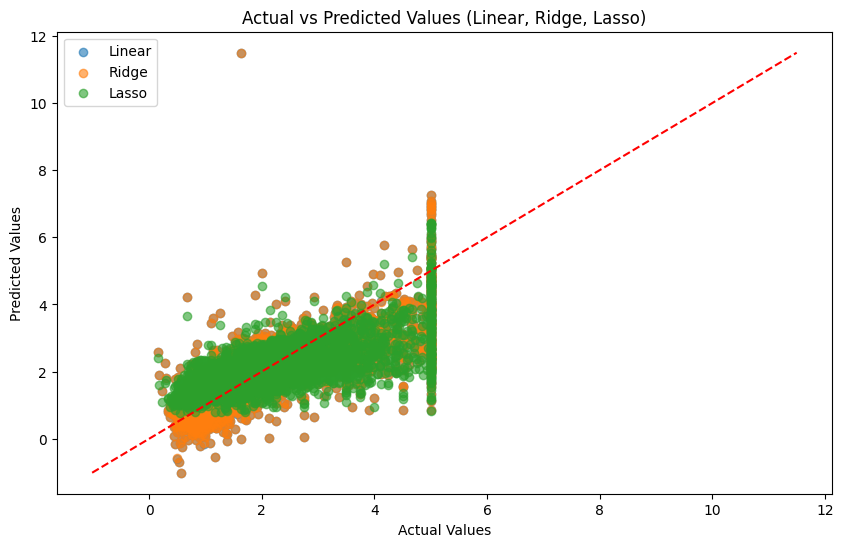

In [12]:
 # --- Visualization 1: Actual vs Predicted --plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linear, label="Linear", alpha=0.6)
plt.scatter(y_test, y_pred_ridge, label="Ridge", alpha=0.6)
plt.scatter(y_test, y_pred_lasso, label="Lasso", alpha=0.6)
min_val = min(y_test.min(), y_pred_linear.min(), y_pred_ridge.min(), y_pred_lasso.min())
max_val = max(y_test.max(), y_pred_linear.max(), y_pred_ridge.max(), y_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear, Ridge, Lasso)")
plt.legend()
plt.show()

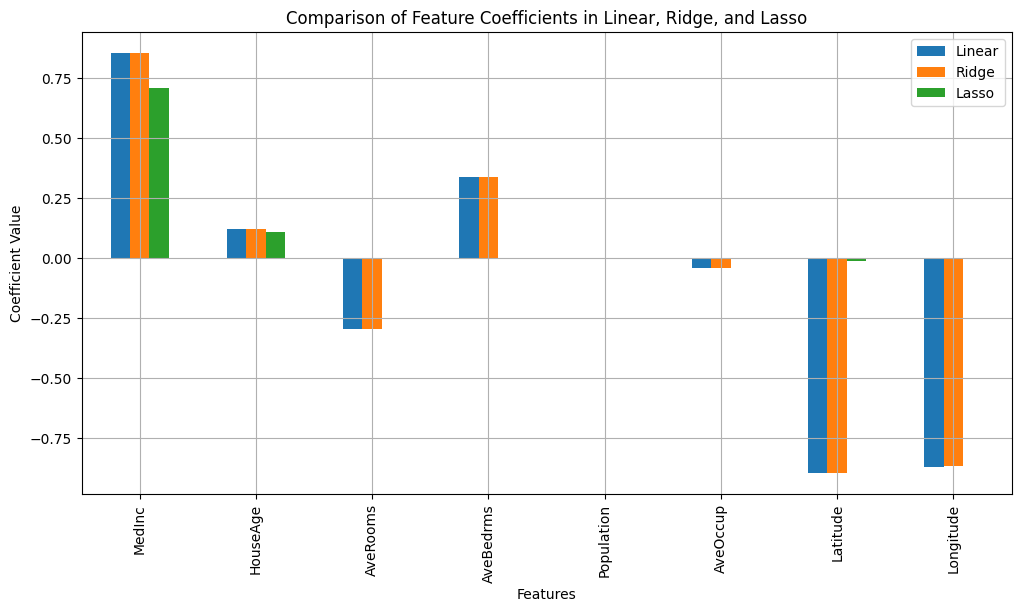

In [13]:
 # --- Visualization 2: Coefficients Comparison --
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': linear.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
coeff_df.set_index('Feature').plot(kind='bar', figsize=(12,6))
plt.title("Comparison of Feature Coefficients in Linear, Ridge, and Lasso")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()